In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('matchtable.csv')

In [3]:
df.head

<bound method NDFrame.head of       int_chllS_1000  int_chllS_300        oc      kd        lat        lon  \
0          18.634841      18.634841  0.268040  0.0528  25.759870 -80.039880   
1          26.339804      26.339804  0.235600  0.0486  25.783750 -80.031720   
2          30.441570      30.441570  0.166175  0.0410  25.808190 -80.023130   
3          27.776776      27.776776  0.149014  0.0370  25.835700 -80.015380   
4          13.253941      13.253941  0.139009  0.0346  25.871000 -80.001070   
...              ...            ...       ...     ...        ...        ...   
5169        5.251709       5.251709  0.765232  0.0912  40.867290 -71.001180   
5170        4.423945       4.423945  0.765232  0.0912  40.867511 -71.000410   
5171        4.270035       4.270035  0.765232  0.0912  40.869021 -70.999932   
5172        4.451968       4.451968  0.835308  0.0964  40.870837 -70.999071   
5173        4.673818       4.673818  0.803958  0.0942  40.877700 -71.003770   

      year  month  mo

In [4]:
y_300=df['int_chllS_300']
y_1000=df['int_chllS_1000']
X=df[['oc','kd','yearday','lat','lon']]


# we will rerun with both start w the deep deep. 
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y_300,test_size=0.2,random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y_1000,test_size=0.2,random_state=4)

len(X_train)

4139

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# For loop to find the best model k
k = []
r2_train = []
r2_test = []
RMSE = []

loops = range(1,31)

for n in loops:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(standardized_X, y_train)

    # Use the model to predict y 
    y_pred = model.predict(standardized_X_test)
    
    # Form our lists to plot
    k.append(n)
    r2_train.append(r2_score(y_train, model.predict(standardized_X)))
    r2_test.append(r2_score(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    


0.6039396990131268
2


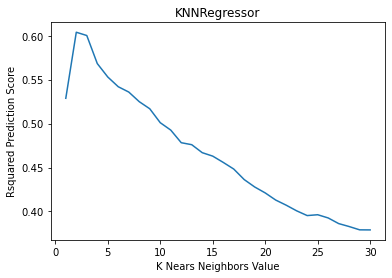

In [7]:
plt.plot(k,r2_test)
plt.xlabel('K Nears Neighbors Value')
plt.ylabel('Rsquared Prediction Score')
plt.title("KNNRegressor")


print(r2_test[1])
print(k[1])

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000,random_state=10)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=10)

In [10]:
# # try makign some predictions using your classifier
# predictions = mlp.predict(X_test)

# plt.plot(y_test, predictions, 'ro')
# print(r2_score(y_test, predictions))

In [11]:
# now build a loop to test how well different number of hidden layers performs
scores = []
scores_list = []
nidx = []

l_range = range(1, 50, 10)
neurons = [5,10,20,40,80,160]



for l in l_range:
    for neuron in neurons:
        
        print(f"Combination: {l} layers with {neuron} neurons.") 
        model = MLPRegressor(hidden_layer_sizes=(neuron,)*l, random_state=4, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores = r2_score(y_test,y_pred)
        scores_list.append(r2_score(y_test,y_pred))
        nidx.append((l/10)+(neuron/160))

Combination: 1 layers with 5 neurons.
Combination: 1 layers with 10 neurons.
Combination: 1 layers with 20 neurons.
Combination: 1 layers with 40 neurons.
Combination: 1 layers with 80 neurons.
Combination: 1 layers with 160 neurons.
Combination: 11 layers with 5 neurons.
Combination: 11 layers with 10 neurons.
Combination: 11 layers with 20 neurons.
Combination: 11 layers with 40 neurons.
Combination: 11 layers with 80 neurons.
Combination: 11 layers with 160 neurons.
Combination: 21 layers with 5 neurons.
Combination: 21 layers with 10 neurons.
Combination: 21 layers with 20 neurons.
Combination: 21 layers with 40 neurons.
Combination: 21 layers with 80 neurons.
Combination: 21 layers with 160 neurons.
Combination: 31 layers with 5 neurons.
Combination: 31 layers with 10 neurons.
Combination: 31 layers with 20 neurons.
Combination: 31 layers with 40 neurons.
Combination: 31 layers with 80 neurons.
Combination: 31 layers with 160 neurons.
Combination: 41 layers with 5 neurons.
Combina

[0.04338624745208397, 0.0788398637554335, 0.14071521594525027, 0.13859387151315705, 0.14535236070901236, 0.19809049837915282, -4.589179822023226e-05, 0.15729497709009965, 0.20118730911386562, 0.2830806196372607, 0.31823628528426895, 0.339149533687336, -4.687288693516756e-05, 0.150270649670598, 0.17055372680791892, 0.14069939830266776, 0.22995641542757828, 0.2900229962218652, -3.988138465715885e-05, 0.18477853272482214, 0.1629963381186248, 0.24361040393837763, 0.18025524224604594, 0.12977788972818327, -2.6113239480984873e-05, 0.15066985309191983, 0.17244095281838, 0.16063356512353888, 0.04817946045270505, 0.02891242134084382]
[0.13125, 0.1625, 0.225, 0.35, 0.6, 1.1, 1.13125, 1.1625, 1.225, 1.35, 1.6, 2.1, 2.13125, 2.1625, 2.225, 2.35, 2.6, 3.1, 3.13125, 3.1625, 3.225, 3.35, 3.6, 4.1, 4.13125, 4.1625, 4.225, 4.35, 4.6, 5.1]


Text(0.5, 0, '[Number of Layers/10 + 1/160*(number of nodes)]')

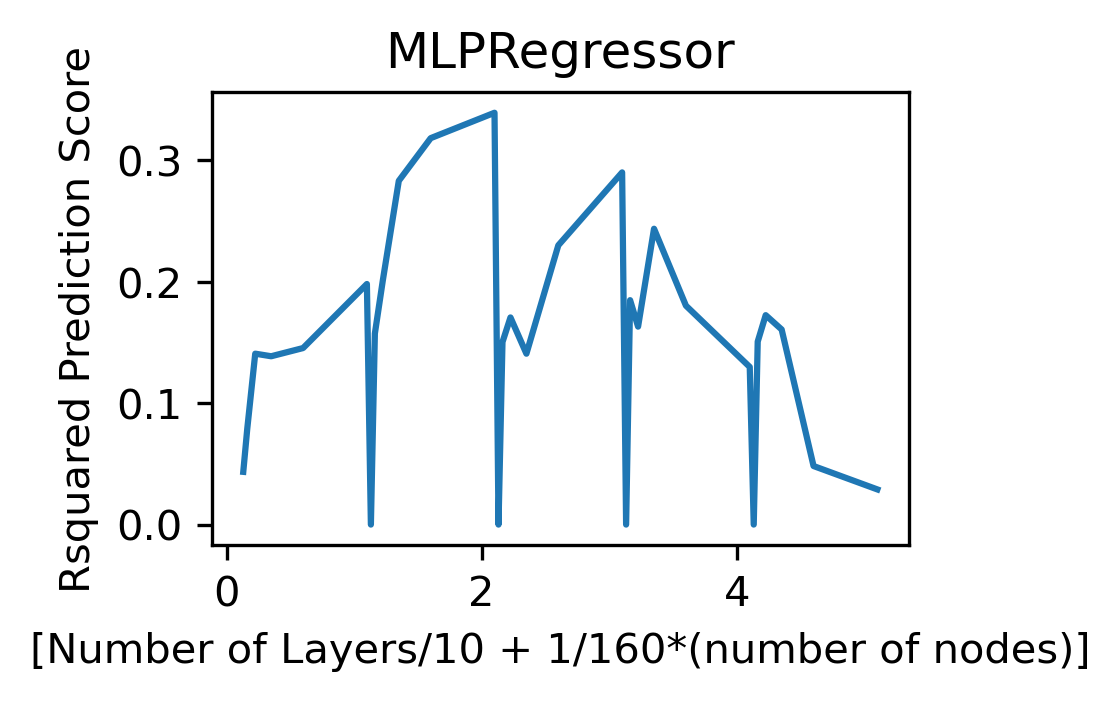

In [14]:
print(scores_list)
print(nidx)
fig = plt.figure(figsize = (3,2), dpi = 300)
plt.plot(nidx,scores_list)
plt.title("MLPRegressor")
plt.ylabel('Rsquared Prediction Score')
plt.xlabel('[Number of Layers/10 + 1/160*(number of nodes)]')
# plt.yticks(np.arange(0, .2, step=0.02))